In [ ]:
import tensorflow as tf
tf.__version__

'2.11.0'

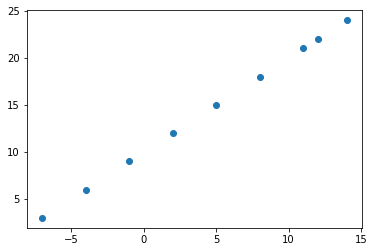

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x= np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,12.0,14])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,22.0,24.0])
plt.scatter(x,y)

In [ ]:
y == x+10 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
house_info = tf.constant(['bathroom','bedroom','garage'])
house_price = tf.constant([19345])
house_info,house_price 

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bathroom', b'bedroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([19345], dtype=int32)>)

In [ ]:
#for predictimg the values does three steps as follows:
tf.random.set_seed(42)
#creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compling the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae']
              )
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 312ms/step - loss: 23.3886 - mae: 23.3886
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 22.9109 - mae: 22.9109
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 22.4745 - mae: 22.4745
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 22.1084 - mae: 22.1084
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 21.7424 - mae: 21.7424
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 21.3763 - mae: 21.3763
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 21.0103 - mae: 21.0103
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 20.6442 - mae: 20.6442
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 20.2782 - mae: 20.2782
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 19.9121 - mae: 19.9121
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 138ms/step


array([[30.654926]], dtype=float32)

In [ ]:
y_pred + 10

array([[40.654926]], dtype=float32)

improving the model

In [ ]:
from keras.api._v2.keras import optimizers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation=None))
model.add(tf.keras.layers.Dense(1))


model.compile(
    loss= 'mae',
    optimizer= tf.keras.optimizers.Adam(lr=0.01),
    metrics= ['mae']
)

model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.4827 - mae: 13.4827
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3509 - mae: 13.3509
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2191 - mae: 13.2191
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 13.0873 - mae: 13.0873
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9553 - mae: 12.9553
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8233 - mae: 12.8233
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6912 - mae: 12.6912
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 12.5590 - mae: 12.5590
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4267 - mae: 12.4267
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2942 - mae: 12.2942
Epoch 11/100
1/1 [==============================] - 0s 9

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 58ms/step


array([[30.411707]], dtype=float32)

evaluating the model

In [ ]:
#make a bigger dataset
x = tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

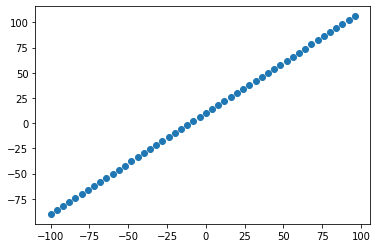

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [ ]:
#create three sets
#training 80% data 
#validating 15% data

x_train= x[:40]
x_test = x[40:]

y_train = y[:40]
y_test = y[40:]
len(x_train),len(y_train),len(y_test),len(x_test)

(40, 40, 10, 10)

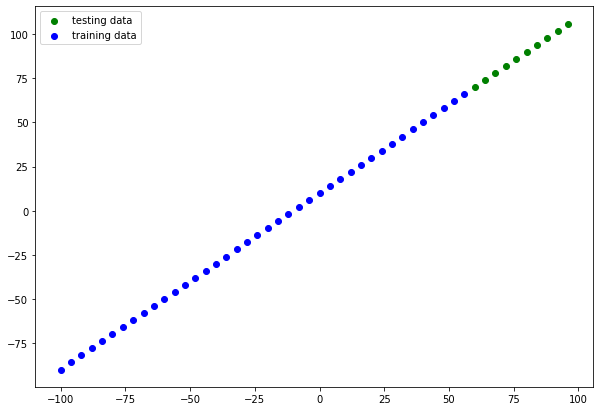

In [ ]:
plt.figure(figsize=(10,7)) # x axis 9 values and y axis 6 values

plt.scatter(x_test,y_test,c='g',label="testing data")

plt.scatter(x_train,y_train,c='b',label="training data")

plt.legend(); # used to display label txt

In [ ]:

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(
      loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [ ]:
model.summary() # model niether to be built or fit for input shape or another method can be followed

ValueError: ignored

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(500,input_shape=[1],name="input_layer"), #params are input_shape+1 * dense may also trainable params
  tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 500)               1000      
                                                                 
 output_layer (Dense)        (None, 1)                 501       
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=100,verbose=0)

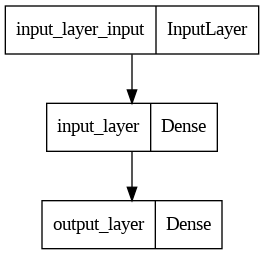

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model)


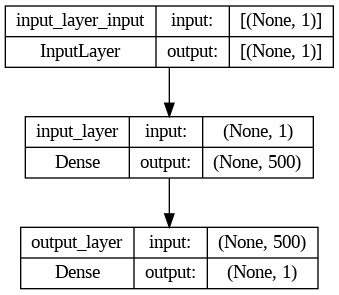

In [ ]:
plot_model(model=model,show_shapes=True)

In [ ]:
pred = model.predict(x_test)
pred



1/1 [==============================] - 0s 48ms/step


array([[ 70.30808 ],
       [ 74.88111 ],
       [ 79.45412 ],
       [ 84.027145],
       [ 88.60014 ],
       [ 93.173164],
       [ 97.74617 ],
       [102.3192  ],
       [106.89221 ],
       [111.465225]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_graph(train_data = x_train,
               label_train = y_train,
               test_data = x_test,
               label_test = y_test,
               prediction = pred):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,label_train,c='b',label="train data")

  plt.scatter(test_data,label_test,c='g',label='test data')

  plt.scatter(test_data,pred,c='r',label="prediction data")

  plt.legend();

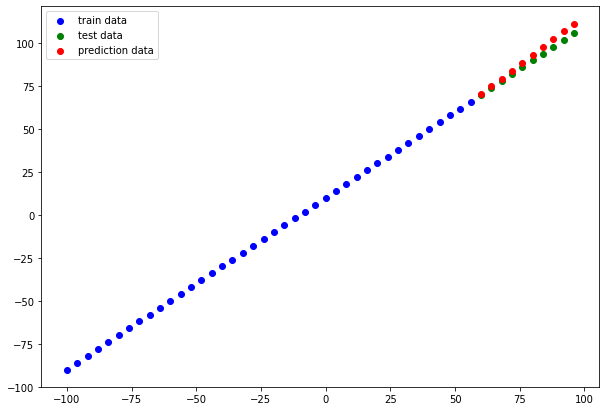

In [ ]:
plot_graph()

In [ ]:
# evaluate the model
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 122ms/step - loss: 2.8867 - mae: 2.8867


[2.8866569995880127, 2.8866569995880127]

In [ ]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=pred)
mae # variation of shape in pred and test returns different value as evaluate

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.753534, 14.271334, 11.818354, 10.394571, 10.      , 10.634633,
       12.298468, 15.055359, 18.892212, 23.465225], dtype=float32)>

In [ ]:
pred = tf.constant(pred)
pred,y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 70.30808 ],
        [ 74.88111 ],
        [ 79.45412 ],
        [ 84.027145],
        [ 88.60014 ],
        [ 93.173164],
        [ 97.74617 ],
        [102.3192  ],
        [106.89221 ],
        [111.465225]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
tf.squeeze(pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.30808 ,  74.88111 ,  79.45412 ,  84.027145,  88.60014 ,
        93.173164,  97.74617 , 102.3192  , 106.89221 , 111.465225],
      dtype=float32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true = y_test,y_pred=tf.squeeze(pred))
mae # result same as the evaluate

<tf.Tensor: shape=(), dtype=float32, numpy=2.886657>

In [ ]:
msd = tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(pred))
msd

<tf.Tensor: shape=(), dtype=float32, numpy=11.041645>

#saving the model

saving the model for the future use
there are two types of saving the model:
* SavedModelForm which is default model
* hdf5 model 

In [ ]:
#saving the model

model.save("better_predicted_model")

In [ ]:
#saving the model with hdf5 format

model.save("better_pred_hdf5.h5")

In [ ]:
#loading the saved model

savedModel = tf.keras.models.load_model("better_predicted_model")
savedModel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 500)               1000      
                                                                 
 output_layer (Dense)        (None, 1)                 501       
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
savedModel_pred = savedModel.predict(x_test)
savedModel_pred

1/1 [==============================] - 0s 92ms/step


array([[ 70.30808 ],
       [ 74.88111 ],
       [ 79.45412 ],
       [ 84.027145],
       [ 88.60014 ],
       [ 93.173164],
       [ 97.74617 ],
       [102.3192  ],
       [106.89221 ],
       [111.465225]], dtype=float32)

In [ ]:
savedModelh5 = tf.keras.models.load_model('better_pred_hdf5.h5')
savedModelh5_pred = savedModelh5.predict(x_test)
savedModelh5_pred

1/1 [==============================] - 0s 45ms/step


array([[ 70.30808 ],
       [ 74.88111 ],
       [ 79.45412 ],
       [ 84.027145],
       [ 88.60014 ],
       [ 93.173164],
       [ 97.74617 ],
       [102.3192  ],
       [106.89221 ],
       [111.465225]], dtype=float32)

In [ ]:
#downloading files from google colab

from google.colab import files

files.download('better_pred_hdf5.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#building the large model

In [3]:
#importing required dataset
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
read_csv = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
read_csv 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#here we have some columns numerical and some other column objects

read_csv['smoker'],read_csv['age']

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [5]:
#lets try one code encoding for the dataset

insurance_one_hot = pd.get_dummies(read_csv)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
# create x and y (features and labels)

x = insurance_one_hot.drop("charges",axis=1)
y= insurance_one_hot["charges"]

In [6]:
#viewing x and y values
x.head()

NameError: ignored

In [15]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
len(x),len(x_train),len(x_test)

(1338, 1070, 268)

In [10]:
tf.random.set_seed(42)

# 1. create a model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
insurance_model.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 5s 3ms/step - loss: 8588.4111 - mae: 8588.4111
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.0029 - mae: 7886.0029
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7588.9585 - mae: 7588.9585
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7734.5806 - mae: 7734.5806
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7687.1885 - mae: 7687.1885
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7611.9014 - mae: 7611.9014
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7642.8105 - mae: 7642.8105
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7741.9907 - mae: 7741.9907
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7599.4766 - mae: 7599.4766
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7718.9736 - mae: 7718.9736

In [22]:
insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7301.6855 - mae: 7301.6855


[7301.685546875, 7301.685546875]

In [23]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

In [26]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)
insurance_model_2.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13269.1660 - mae: 13269.1660
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13077.0879 - mae: 13077.0879
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12680.2305 - mae: 12680.2305
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 11921.8398 - mae: 11921.8398
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10699.0977 - mae: 10699.0977
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9222.6924 - mae: 9222.6924
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7973.2261 - mae: 7973.2261
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7484.3970 - mae: 7484.3970
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7418.2197 - mae: 7418.2197
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7399.0293 - mae:

In [28]:
insurance_model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4870.5850 - mae: 4870.5850


[4870.5849609375, 4870.5849609375]

In [29]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)
history = insurance_model_3.fit(x_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 5ms/step - loss: 13253.0957 - mae: 13253.0957
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13024.9697 - mae: 13024.9697
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 12565.8057 - mae: 12565.8057
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 11717.6680 - mae: 11717.6680
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10428.7871 - mae: 10428.7871
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 8965.0762 - mae: 8965.0762
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 7832.0254 - mae: 7832.0254
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7462.2046 - mae: 7462.2046
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7410.7871 - mae: 7410.7871
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7391.3887 - mae:

Text(0.5, 0, 'epochs')

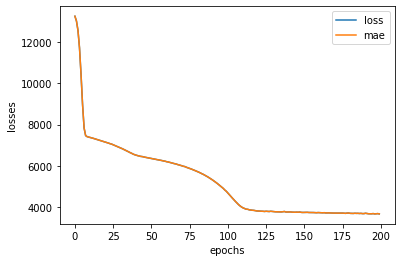

In [33]:
pd.DataFrame(history.history).plot()
plt.ylabel("losses")
plt.xlabel("epochs")

#Normalization and standardization


<Axes: ylabel='Frequency'>

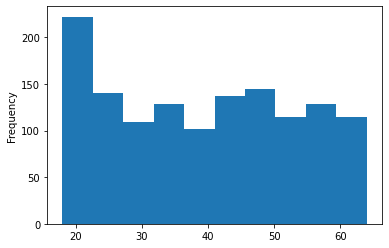

In [35]:
x['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

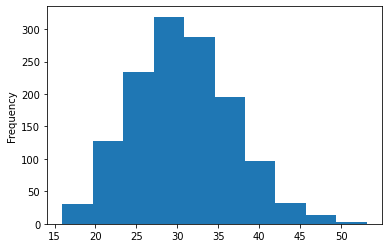

In [37]:
x['bmi'].plot(kind='hist')

In [39]:
x['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


to prepare data we need to import some classes from the scikit learn

In [25]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
#make column transformer
read_csv = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")


ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

#  create x and y values

x = read_csv.drop("charges",axis=1)
y= read_csv["charges"]

# split x and y
x_test,x_train,y_test,y_train = train_test_split(x,y,train_size=0.20,random_state=42)

#  fit the data to the transformer

ct.fit(x_train)

# transforming the test and train for scaling MinMaxScaler and OneHotEncoding

x_test_normal = ct.transform(x_test)
x_train_normal = ct.transform(x_train)



In [27]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [29]:
x_test_normal[0]

array([0.7826087 , 0.42884046, 0.2       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

In [34]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)
history = insurance_model_4.fit(x_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13308.0537 - mae: 13308.0537
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13300.5068 - mae: 13300.5068
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13281.4004 - mae: 13281.4004
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13240.3262 - mae: 13240.3262
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13165.9609 - mae: 13165.9609
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13047.4375 - mae: 13047.4375
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12874.0635 - mae: 12874.0635
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12635.7744 - mae: 12635.7744
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12322.5996 - mae: 12322.5996
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 11928.44

In [35]:
insurance_model_4.evaluate(x_test_normal,y_test) #model should be evaluted with only the type of trained data

9/9 [==============================] - 0s 3ms/step - loss: 3647.8965 - mae: 3647.8965


[3647.896484375, 3647.896484375]

Text(0.5, 0, 'epoches')

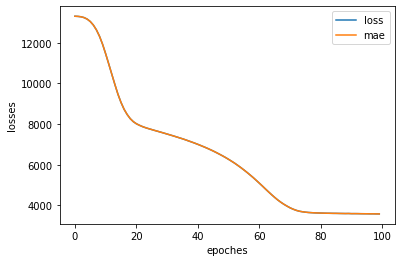

In [36]:
pd.DataFrame(history.history).plot()
plt.ylabel("losses")
plt.xlabel("epoches")